In [1]:
# EDA and Preprocessing 
# Objective: 
# The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.
# Key Components to be fulfilled: 

# 1.Data Exploration: (Score : 2) 
# Explore the data, list down the unique values in each feature and find its length. 
# Perform the statistical analysis and renaming of the columns. 

# 2.Data Cleaning: (Score : 2) 
# Find the missing and inappropriate values, treat them appropriately. 
# Remove all duplicate rows. 
# Find the outliers. 
# Replace the value 0 in age as NaN 
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) 

# 3.Data Analysis: (Score : 2) 
# Filter the data with age >40 and salary<5000 
# Plot the chart with age and salary 
# Count the number of people from each place and represent it visually 

# 4. Data Encoding: (Score : 2) 
# Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms. 

# 5.Feature Scaling: (Score : 2) 
# After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler. 

In [138]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr, zscore, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [139]:
#Read data
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [140]:
print("Basic information:")
df.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [141]:
print("Rows and column distribution:")
df.shape

Rows and column distribution:


(148, 6)

In [142]:
print("Columns:")
df.columns

Columns:


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [143]:
print("Statistical description:")
df.describe()

Statistical description:


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [144]:
# Finding missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [145]:
print (df)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


# 1.Data Exploration: 


### Explore the data, list down the unique values in each feature and find its length.
### Perform the statistical analysis and renaming of the columns.

In [146]:
print("Initial Data Info:")
df.info()
    

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [147]:
print("\nUnique values per column:")
print({col: df[col].nunique() for col in df.columns})


Unique values per column:
{'Company': 6, 'Age': 29, 'Salary': 40, 'Place': 11, 'Country': 1, 'Gender': 2}


In [148]:
unique_values = {col: (df[col].unique(), len(df[col].unique())) for col in df.columns}
print("Unique Values and Their Counts:")
for col, (values, count) in unique_values.items():
    print(f"{col}: {count} unique values\n{values}\n")


Unique Values and Their Counts:
Company: 7 unique values
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age: 30 unique values
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary: 41 unique values
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Place: 12 unique values
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country: 1 unique values
['India']

Gender: 2 unique values
[0 1]



In [149]:
print("\nStatistical Analysis:")
statistical_analysis = df.describe(include='all')
print(statistical_analysis)


Statistical Analysis:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [150]:
# Renaming columns
df.rename(columns={
    'Company': 'Company_Name',
    'Age': 'Employee_Age',
    'Salary': 'Employee_Salary',
    'Place': 'Location',
    'Country': 'Country_Name',
    'Gender': 'Gender(0=Male, 1=Female)'
}, inplace=True)

In [151]:
df.rename(columns={
    'Gender': 'Gender(0=Male, 1=Female)'
}, inplace=True)

In [152]:
print(df.head())

  Company_Name  Employee_Age  Employee_Salary  Location Country_Name  \
0          TCS          20.0              NaN   Chennai        India   
1      Infosys          30.0              NaN    Mumbai        India   
2          TCS          35.0           2300.0  Calcutta        India   
3      Infosys          40.0           3000.0     Delhi        India   
4          TCS          23.0           4000.0    Mumbai        India   

   Gender(0=Male, 1=Female)  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


# 2. Data Cleaning

In [153]:
# Identifying missing values

print("Missing values:")
df.isnull().sum()

Missing values:


Company_Name                 8
Employee_Age                18
Employee_Salary             24
Location                    14
Country_Name                 0
Gender(0=Male, 1=Female)     0
dtype: int64

In [154]:
# Remove all duplicate rows. 
df.drop_duplicates(inplace=True)
df

,Company_Name,Employee_Age,Employee_Salary,Location,Country_Name,"Gender(0=Male, 1=Female)"
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [155]:
# Handling Null Values
# numerical column
df['Employee_Age'] = df['Employee_Age'].replace(0, np.nan)  #Replace the value 0 in age as NaN
df['Employee_Salary'] = df['Employee_Salary'].fillna(df['Employee_Salary'].mean())

In [156]:
# Handling Null Values
# categorical column
df['Company_Name'] = df['Company_Name'].fillna(df['Company_Name'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [157]:
# Finding missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Company_Name                 0
Employee_Age                23
Employee_Salary              0
Location                     0
Country_Name                 0
Gender(0=Male, 1=Female)     0
dtype: int64

In [158]:
# Find the outliers.

In [159]:
# Outlier Detection & Removal (IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

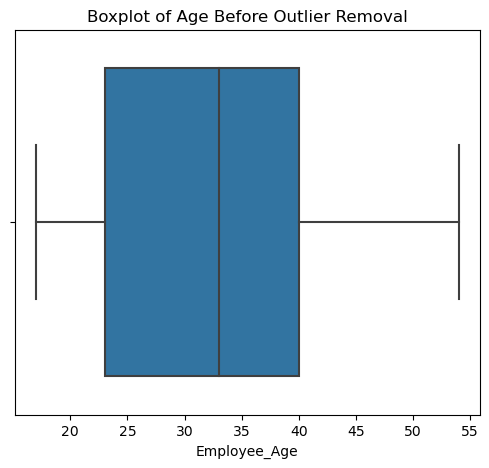

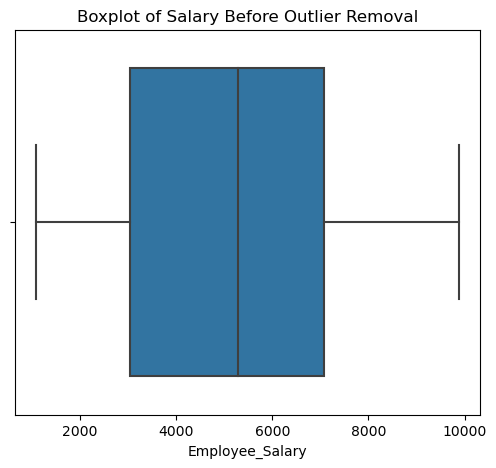

In [160]:
# Visualizing Outliers Before Removal
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Employee_Age'])
plt.title("Boxplot of Age Before Outlier Removal")
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Employee_Salary'])
plt.title("Boxplot of Salary Before Outlier Removal")
plt.show()

In [161]:
# Removing Outliers
df = remove_outliers(df, 'Employee_Age')
df = remove_outliers(df, 'Employee_Salary')

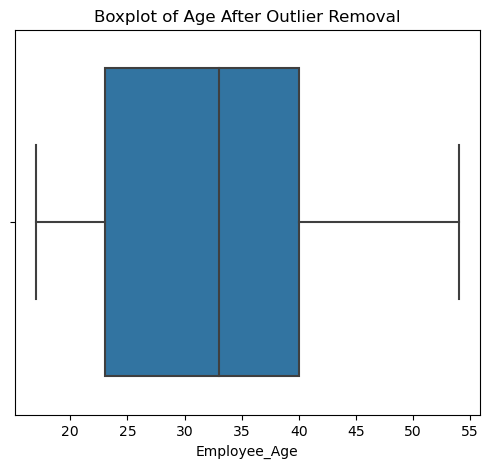

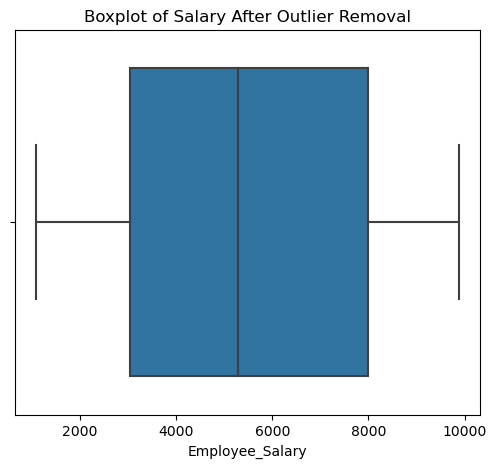

In [162]:
# Visualizing Outliers After Removal
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Employee_Age'])
plt.title("Boxplot of Age After Outlier Removal")
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Employee_Salary'])
plt.title("Boxplot of Salary After Outlier Removal")
plt.show()


# 3.Data Analysis:

### i) Filter the data with age >40 and salary<5000 

In [163]:
filtered_df = df[(df['Employee_Age'] > 40) & (df['Employee_Salary'] < 5000)]
print("\nFiltered Data (Employee_Age > 40, Employee_Salary < 5000):")
print(filtered_df.head())



Filtered Data (Employee_Age > 40, Employee_Salary < 5000):
   Company_Name  Employee_Age  Employee_Salary   Location Country_Name  \
21      Infosys          50.0           3184.0      Delhi        India   
32      Infosys          45.0           4034.0   Calcutta        India   
39      Infosys          41.0           3000.0     Mumbai        India   
50      Infosys          41.0           3000.0    Chennai        India   
57      Infosys          51.0           3184.0  Hyderabad        India   

    Gender(0=Male, 1=Female)  
21                         0  
32                         0  
39                         0  
50                         0  
57                         0  


### ii)Plot the chart with age and salary 

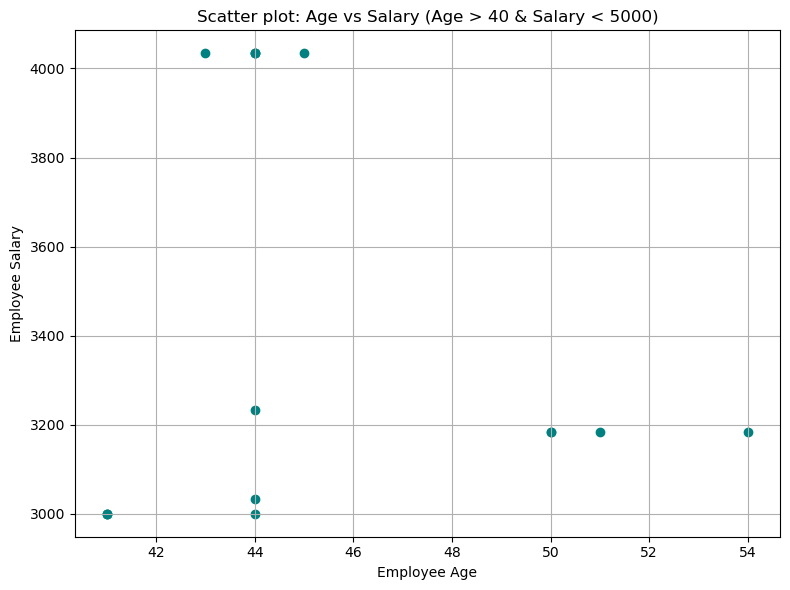

In [164]:
# Plotting age vs salary for the filtered data
data = df[(df['Employee_Age'] > 40) & (df['Employee_Salary'] < 5000)]
plt.figure(figsize=(8, 6))
plt.scatter(data['Employee_Age'], data['Employee_Salary'], color='teal')
plt.title('Scatter plot: Age vs Salary (Age > 40 & Salary < 5000)')
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.grid(True)
plt.tight_layout()
plt.show()



Most of the employees have salary below 3400 according to the chart

### iii)Count the number of people from each place and represent it visually 

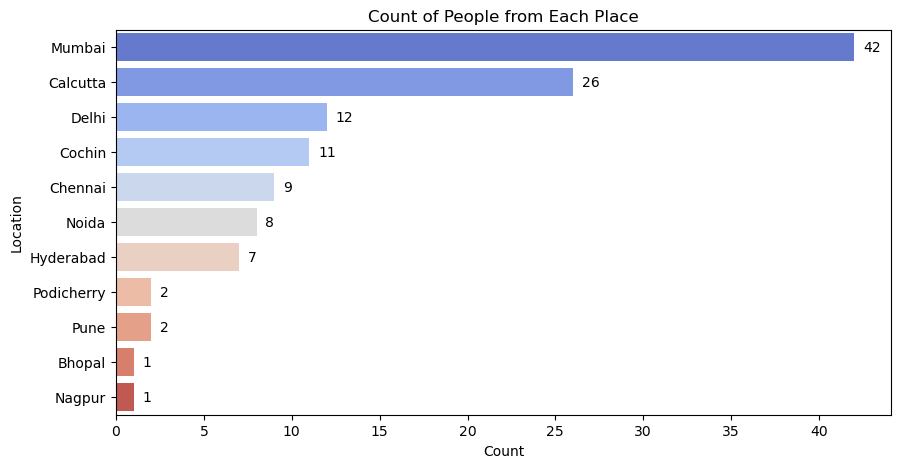

In [165]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Count of People from Each Place")

# Adding labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.5, p.get_y() + p.get_height()/2), ha='left', va='center')

plt.show()


* Mumbai is the place with highest number of employees whereas Nagpur and Bhopal has lowest number of employees

# 4. Data Encoding


### Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms. 

In [166]:
# Applying Label Encoding to 'Country Name' column
label_encoder = LabelEncoder()
df['Country_Name'] = label_encoder.fit_transform(df['Country_Name'])
print("Original Data:")
print(df)



Original Data:
        Company_Name  Employee_Age  Employee_Salary  Location  Country_Name  \
0                TCS          20.0      5283.471074   Chennai             0   
1            Infosys          30.0      5283.471074    Mumbai             0   
2                TCS          35.0      2300.000000  Calcutta             0   
3            Infosys          40.0      3000.000000     Delhi             0   
4                TCS          23.0      4000.000000    Mumbai             0   
..               ...           ...              ...       ...           ...   
142  Infosys Pvt Lmt          22.0      8202.000000    Mumbai             0   
143              TCS          33.0      9024.000000  Calcutta             0   
145          Infosys          44.0      4034.000000     Delhi             0   
146              TCS          33.0      5034.000000    Mumbai             0   
147          Infosys          22.0      8202.000000    Cochin             0   

     Gender(0=Male, 1=Female)  
0   

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for 'Company' and 'Place'
label_encoders = {}
categorical_columns = ['Company_Name', 'Location']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Converting categorical values into numbers
    label_encoders[col] = le  # Storing encoders for reference

# One-Hot Encoding (If needed)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = one_hot_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenating One-Hot Encoded Data
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

print("\nFinal Processed Data After Encoding:")
print(df.head())



Final Processed Data After Encoding:
   Employee_Age  Employee_Salary  Country_Name  Gender(0=Male, 1=Female)  \
0          20.0      5283.471074           0.0                       0.0   
1          30.0      5283.471074           0.0                       0.0   
2          35.0      2300.000000           0.0                       0.0   
3          40.0      3000.000000           0.0                       0.0   
4          23.0      4000.000000           0.0                       0.0   

   Company_Name_1  Company_Name_2  Company_Name_3  Company_Name_4  \
0             0.0             0.0             0.0             1.0   
1             0.0             1.0             0.0             0.0   
2             0.0             0.0             0.0             1.0   
3             0.0             1.0             0.0             0.0   
4             0.0             0.0             0.0             1.0   

   Company_Name_5  Location_1  Location_2  Location_3  Location_4  Location_5  \
0        

# 5.Feature Scaling:


### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler. 

In [169]:
# 3. Splitting the Data rondomly (80-20% split)
X = df[['Employee_Age', 'Employee_Salary']]  # Features
y = df['Gender(0=Male, 1=Female)']  # Target variable
# Here I assumed the columns ['Employee_Age', 'Employee_Salary'] as features and column ['Gender(0=Male, 1=Female)'] as the target variable.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Data (Features):")
print(X_train)
print("\nTesting Data (Features):")
print(X_test)


Training Data (Features):
     Employee_Age  Employee_Salary
139          22.0      2934.000000
18           22.0      5283.471074
20           37.0      3045.000000
12           45.0      5283.471074
40           24.0      4345.000000
..            ...              ...
81           43.0      9000.000000
128          33.0      3045.000000
16           23.0      3030.000000
109          33.0      5283.471074
124          22.0      8787.000000

[112 rows x 2 columns]

Testing Data (Features):
     Employee_Age  Employee_Salary
76           32.0      4000.000000
133          22.0      8943.000000
35           35.0      9024.000000
57           51.0      3184.000000
115          22.0      8787.000000
107           NaN              NaN
97           22.0      8943.000000
140          44.0      4034.000000
95            NaN              NaN
14           40.0      3000.000000
31           20.0      2934.000000
51           24.0      3000.000000
21           50.0      3184.000000
127          

In [171]:
# StandardScaler (Standard Scaling) mean=0,std=1
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

In [172]:
# MinMaxScaler (Normalization)
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [173]:
print("\nStandard Scaled Training Data:")
print(X_train_scaled_standard)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled_minmax)


Standard Scaled Training Data:
[[-1.13959911 -1.0157411 ]
 [-1.13959911 -0.04952815]
 [ 0.59326543 -0.97009268]
 [ 1.51745984 -0.04952815]
 [-0.9085505  -0.43547157]
 [ 1.05536264  1.59567742]
 [-0.9085505  -0.04952815]
 [ 1.40193554 -0.97502765]
 [ 0.13116822  1.20951647]
 [-1.37064771 -0.16240355]
 [ 0.13116822 -1.77449184]
 [-1.37064771 -0.04952815]
 [-0.7930262   0.46844936]
 [ 1.51745984 -0.56336939]
 [-0.9085505  -0.04952815]
 [-1.0240748   1.83913565]
 [ 0.36221682 -1.38586341]
 [        nan         nan]
 [-1.25512341 -0.9885988 ]
 [ 0.24669252 -0.04952815]
 [ 1.05536264 -0.9885988 ]
 [ 0.24669252 -0.16610478]
 [ 0.93983833  1.59567742]
 [ 1.63298415  1.47888327]
 [ 0.24669252  1.20951647]
 [ 2.55717856 -0.91292935]
 [ 0.47774112 -0.16610478]
 [ 1.40193554 -0.892367  ]
 [ 0.36221682 -0.16610478]
 [-0.6775019   1.15070815]
 [ 1.40193554  1.59567742]
 [        nan         nan]
 [ 1.40193554  1.83913565]
 [ 0.24669252 -1.77449184]
 [ 0.36221682 -0.04952815]
 [-1.25512341 -0.049528